In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import numpy as np
import scipy
from scipy.optimize import curve_fit

#### load data

In [167]:
input_csv = "vidro-1kHz-60mBias2.csv"

df = pd.read_csv(input_csv, comment='#', names=['x', 'y', 'p', 't'])
df.head()

,x,y,p,t
0,639,517,1,7584
1,644,517,1,7584
2,645,517,1,7584
3,647,517,1,7584
4,649,517,1,7584


### Filter (small region just to calculate phase per pixel) and see the ROI


Number of data points: 880
            x    y  p        t
43643211  647  259  1  1100700
43643213  647  258  1  1100700
43643219  646  280  1  1100700
43643220  647  280  1  1100700
43643227  646  281  1  1100700
...       ...  ... ..      ...
43645771  648  302  1  1100750
43645772  649  302  1  1100750
43645780  647  303  1  1100750
43645781  648  303  1  1100750
43645782  649  303  1  1100750

[880 rows x 4 columns]
Time range: 1100700 to 1100750
Filtered data:
     x    y  p        t
0  647  259  1  1100700
1  647  258  1  1100700
2  646  280  1  1100700
3  647  280  1  1100700
4  646  281  1  1100700
Number of events: 880
Density array shape: (216067,)
Density indices shape: (880,)
Max density index: 187245
Min density index: 955
Densities size: 216067
Density indices (first 10): [41135 40702 50228 50228 50661 50661 50661 50661 51094 51094]


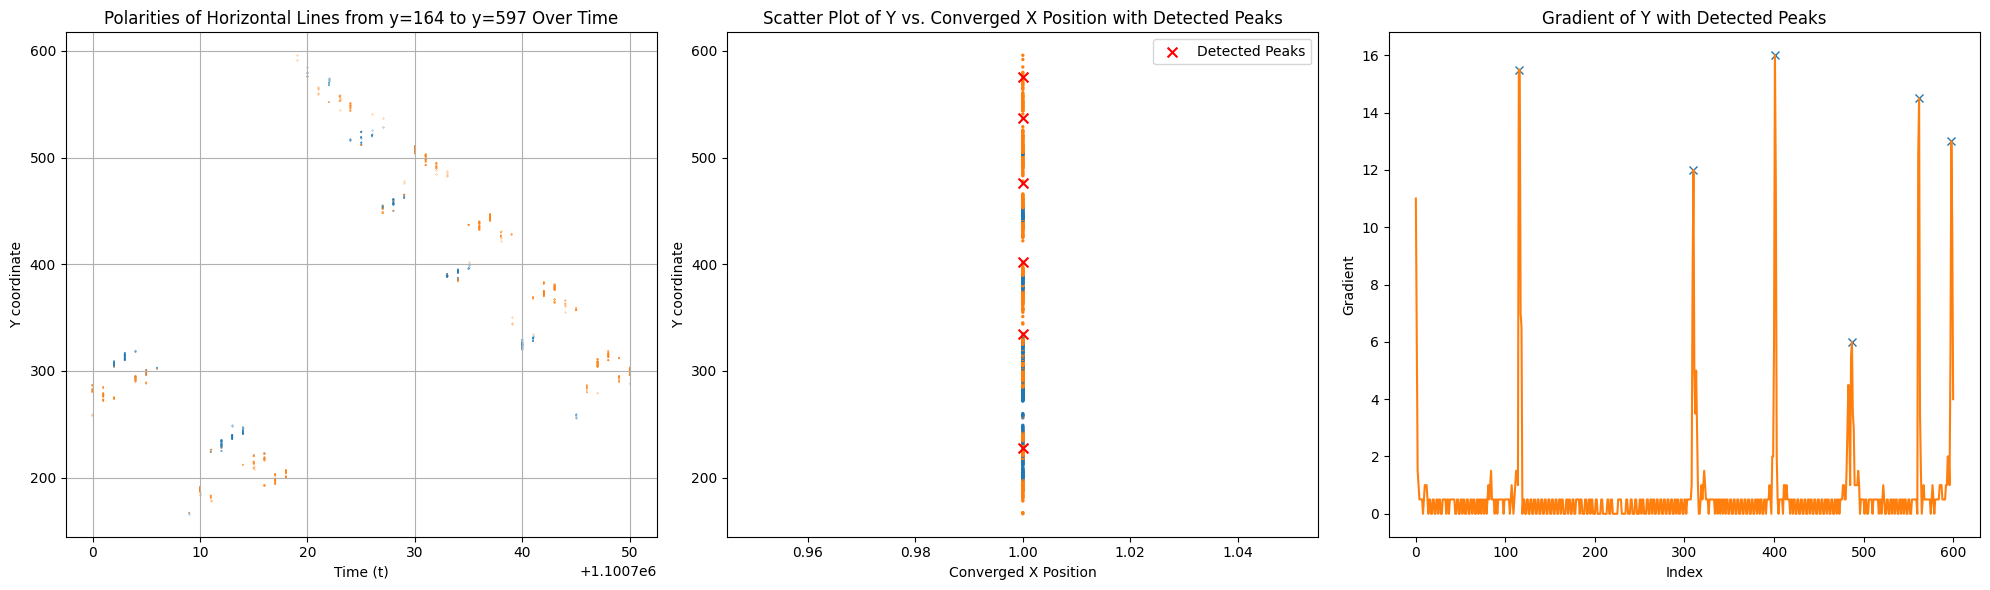

[228 335 402 476 537 576]


In [168]:
from polarityarea2 import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Define the parameters
tmin = 1100700
tmax = 1100750
ymin = 164
ymax = 597
xmin = 646
xmax = 651
polarity = None

# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()

# Sort the data based on y
x = line_df['x'].to_numpy()
y = line_df['y'].to_numpy()
t = line_df['t'].to_numpy()
p = line_df['p'].to_numpy()

idx = np.argsort(y)
x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

# Separate the data based on polarity
yp = y[p == 1]
yn = y[p == 0]

# Calculate the gradient of yp
gradyp = np.gradient(yp)

# Find peaks in the gradient of the y data for polarity = 1
peaksidx, _ = find_peaks(gradyp, distance=10, prominence=2)

# Create the ysplit and phisplit arrays
ysplit = yp[peaksidx]
phisplit = np.arange(0, 2 * np.pi * len(ysplit), 2 * np.pi)

# Create a subplot grid with 1 row and 3 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# First plot: Using plot_lines_polarity_over_time
plot_lines_polarity_over_time(input_csv, xmin, xmax, ymin, ymax, tmin, tmax, polarity, ax=ax1)

# Second plot: Scatter plot of y vs. position (converged x)
colors = ["C0", "C1"]
colors_vec = [colors[p] for p in line_df['p']]

# Set all x positions to the same value (e.g., 1) to align them vertically
converged_x = np.ones(len(t))
ax2.scatter(converged_x, y, s=2, c=colors_vec)

# Overlay the detected peaks on the scatter plot
ax2.scatter(converged_x[peaksidx], yp[peaksidx], s=50, c="red", marker="x", label="Detected Peaks")

# Configure labels and title for the second plot
ax2.set_xlabel('Converged X Position')
ax2.set_ylabel('Y coordinate')
ax2.set_title('Scatter Plot of Y vs. Converged X Position with Detected Peaks')
ax2.legend()

# Third plot: Gradient of y with peaks
ax3.plot(peaksidx, abs(gradyp[peaksidx]), "x")
ax3.plot(gradyp)
ax3.set_title('Gradient of Y with Detected Peaks')
ax3.set_xlabel('Index')
ax3.set_ylabel('Gradient')

plt.tight_layout()
plt.show()

print(ysplit)


In [169]:
phisplit

array([ 0.        ,  6.28318531, 12.56637061, 18.84955592, 25.13274123,
       31.41592654])

[0.         0.05872136 0.11744272 0.17616407 0.23488543 0.29360679
 0.35232815 0.41104951 0.46977086 0.52849222 0.58721358 0.64593494
 0.7046563  0.76337765 0.82209901 0.88082037 0.93954173 0.99826309
 1.05698444 1.1157058  1.17442716 1.23314852 1.29186988 1.35059123
 1.40931259 1.46803395 1.52675531 1.58547667 1.64419802 1.70291938
 1.76164074 1.8203621  1.87908346 1.93780481 1.99652617 2.05524753
 2.11396889 2.17269025 2.2314116  2.29013296 2.34885432 2.40757568
 2.46629704 2.52501839 2.58373975 2.64246111 2.70118247 2.75990383
 2.81862518 2.87734654 2.9360679  2.99478926 3.05351062 3.11223197
 3.17095333 3.22967469 3.28839605 3.34711741 3.40583876 3.46456012
 3.52328148 3.58200284 3.6407242  3.69944555 3.75816691 3.81688827
 3.87560963 3.93433099 3.99305234 4.0517737  4.11049506 4.16921642
 4.22793778 4.28665913 4.34538049 4.40410185 4.46282321 4.52154457
 4.58026592 4.63898728 4.69770864 4.75643    4.81515136 4.87387271
 4.93259407 4.99131543 5.05003679 5.10875815 5.1674795  5.2262

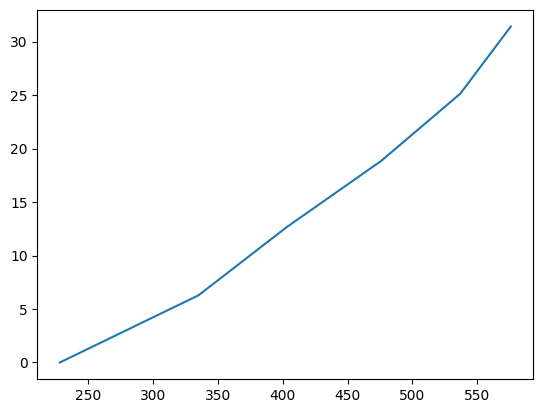

In [170]:
yroi = np.arange(ysplit[0], ysplit[-1] + 1)
phiroi = np.interp(yroi, ysplit, phisplit)
plt.plot(yroi, phiroi)
phiroi = np.mod(phiroi, 2 * np.pi) #between 0,2pi
print(phiroi)

### filter data (main data- bigger time period)

In [171]:
%matplotlib inline
# Define the parameters
tmin = 1100000
tmax = 2000000
ymin = yroi[0]
ymax = yroi[-1]


# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()


Number of data points: 10151682
            x    y  p        t
43614084  646  501  1  1100000
43614085  647  501  1  1100000
43614090  646  503  1  1100000
43614091  648  503  1  1100000
43614099  646  480  0  1100000
...       ...  ... ..      ...
79461685  646  371  0  2000000
79461687  649  372  0  2000000
79461690  647  373  0  2000000
79461691  649  373  0  2000000
79461695  649  361  0  2000000

[10151682 rows x 4 columns]
Time range: 1100000 to 2000000


### phase per pixel method application

yp: [273 275 275 ...  96  96  93]
phase: [2.57507595 2.78108202 2.78108202 ... 5.63725037 5.63725037 5.4610863 ]
7550200
7550200


(0.0, 2000.0)

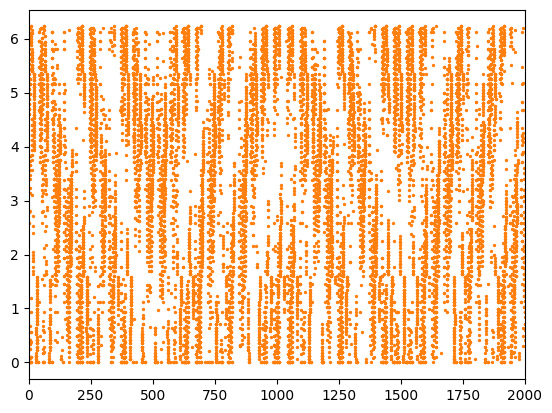

In [172]:

colors = ["C0", "C1"]

colors_vec = [colors[p] for p in line_df['p']]
x = line_df['x']
p = line_df['p']
t = line_df['t']
y = line_df['y']

x = np.array(x)
y = np.array(y)
p = np.array(p)
t = np.array(t)

idx = np.argsort(t)

x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

t = t-t[0]

yp = y[p==1]
tp = t[p==1]
yn = y[p==0]

tp = tp-tp[0]

yp = yp-ymin

phase = np.array([phiroi[yi] for yi in yp])

print("yp:", yp)
#print("phiroi:", phiroi[180])
print("phase:", phase)
##yp = np.mod(yp, pixels_per_period)
#yp = np.mod(yp, 84)

tp_uniques = np.unique(tp)

##phase = yp*phaseperpixel
print(len(tp))
print(len(phase))
plt.scatter(tp, phase, s=2, c="C1")
plt.xlim(0,2000)

### Calculation of phase (centroids)

In [173]:
tp_uniques = np.unique(tp)
centroid_y = []
tval_vec = []

for i,tval in enumerate(tp_uniques):
    yval = phase[tp==tval]
    ycomplex = np.cos(yval)+1j*np.sin(yval)

    ymean = np.angle(np.mean(ycomplex))

    
    #print(i, ymean)
    centroid_y.append(ymean)
    tval_vec.append(tval)

    if i > 5500:
        break

centroid_y = np.array(centroid_y)
tval_vec = np.array(tval_vec)


In [174]:
centroid_y,tval_vec

(array([ 2.67807898, -0.74349395, -1.16240293, ..., -2.91489448,
         1.69244657,  2.06646052]),
 array([   0,    2,    3, ..., 7818, 7819, 7820], dtype=int64))

### phases of events over time

(0.0, 2000.0)

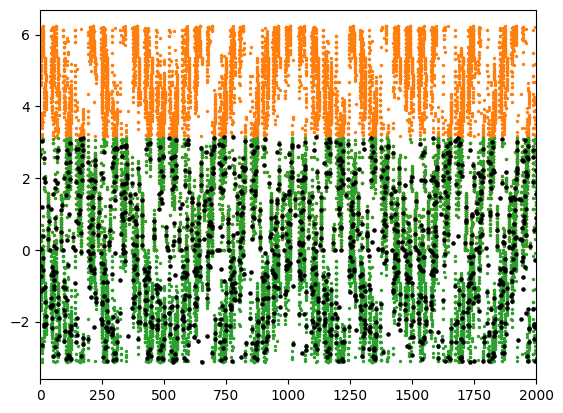

In [175]:
plt.scatter(tp, phase, s=2, c="C1")
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.xlim(0,2000)

### plot of the real and imaginary parts of complex numbers representing phase centroids

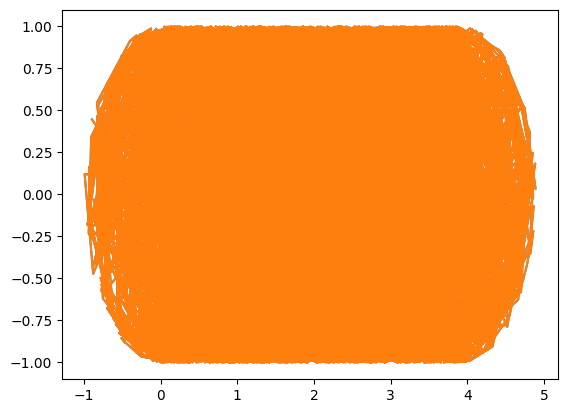

In [176]:
phase_complex = np.cos(centroid_y)+1j*np.sin(centroid_y)

#phase_complex = phase_complex[:100]

plt.plot(phase_complex.real+tval_vec/2000, phase_complex.imag, '-')
plt.plot(phase_complex.real+tval_vec/2000, phase_complex.imag, '-')


### Kalman filter to smooth the phase data derived from the centroid phases

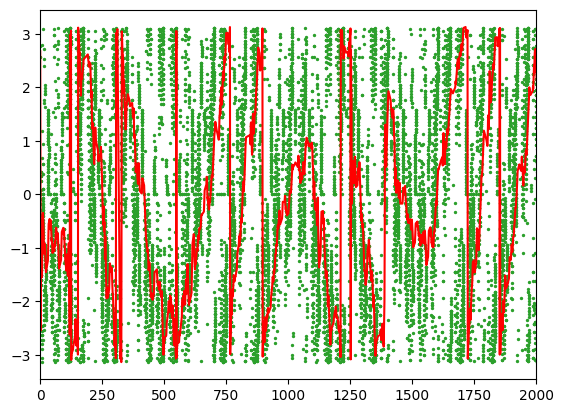

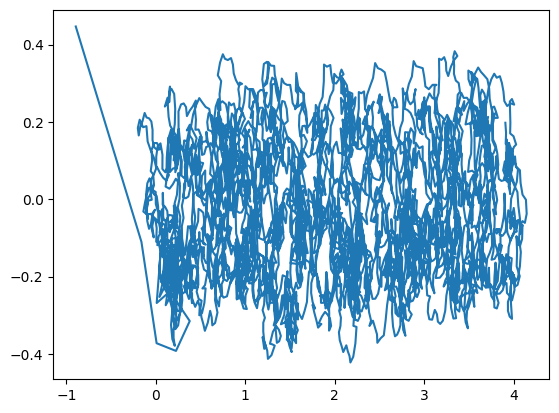

In [177]:
from kalman import KalmanTracking


Track = KalmanTracking()
Track.cov = 0.5 #Sets the initial covariance, representing the uncertainty in the initial state estimate.
Track.error_proc = 0.0001 #Sets the estimated process error, representing how much you expect the process to vary between steps.
Track.error_measurement = 0.075+0.05j #Sets the estimated measurement error, which includes both real and imaginary components.

complex_kalman = np.array([Track(c) for c in phase_complex])
phase_kalman = np.angle(complex_kalman)
#plt.plot(phase_complex.real+tval_vec/10000, phase_complex.imag, '.')
#plt.plot(phase_kalman.real+tval_vec/10000, phase_kalman.imag, '.')


plt.figure()
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
#plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.plot(tval_vec, phase_kalman, c="r")
plt.xlim(0,2000)

plt.figure()
plt.plot(complex_kalman.real+tval_vec/2000, complex_kalman.imag, '-')


12.365204037863991

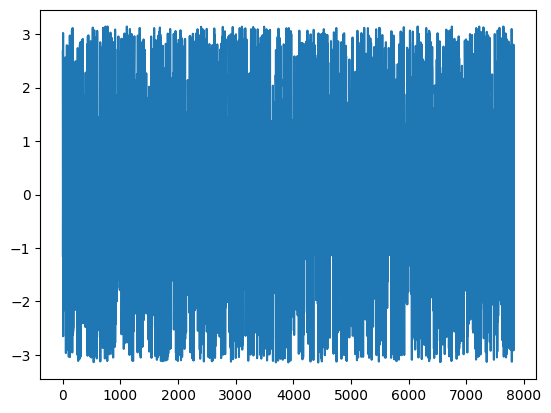

In [178]:
plt.plot(tval_vec, centroid_y)




np.ptp(np.diff(centroid_y)).max()


### Phase Unwrapping and Continuous Phase Analysis


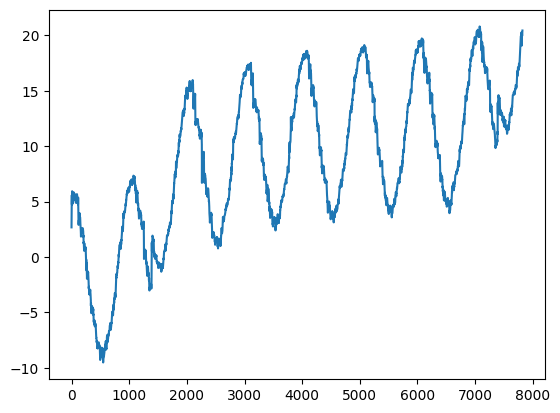

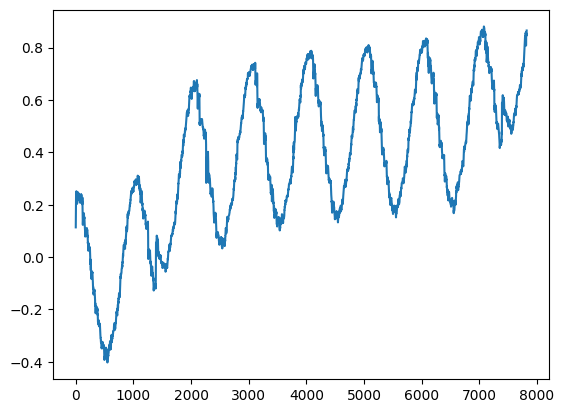

In [179]:
wavelength = 532e-9
centroid_y = np.unwrap(centroid_y)
centroid_y = np.unwrap(phase_kalman)

diff_phase = centroid_y - np.append([centroid_y[0]], np.diff(centroid_y))
plt.plot(tval_vec, centroid_y)
#plt.plot(tval_vec, diff_phase)
z = centroid_y/(2*np.pi)*wavelength/2

plt.figure()
plt.plot(tval_vec, z/1e-6)


### Displacement calc (nano)

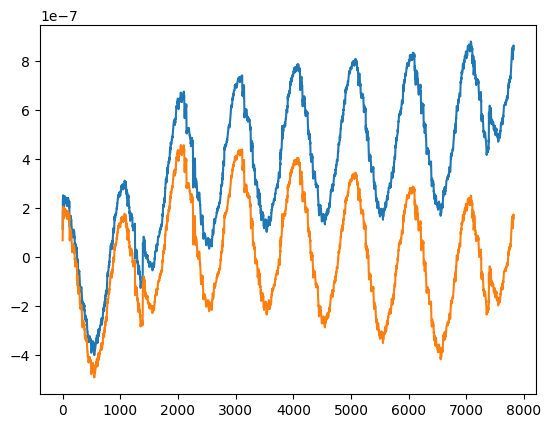

In [180]:
t_step = 1

t_interp = np.arange(tval_vec.min(), tval_vec.max(), t_step)
z_interp = np.interp(t_interp, tval_vec, z)

plt.plot(t_interp, z_interp)

z_detrend = scipy.signal.detrend(z_interp)
plt.plot(t_interp, z_detrend)


### FFT for finding main frequency of the signal

(0.0, 2000.0)

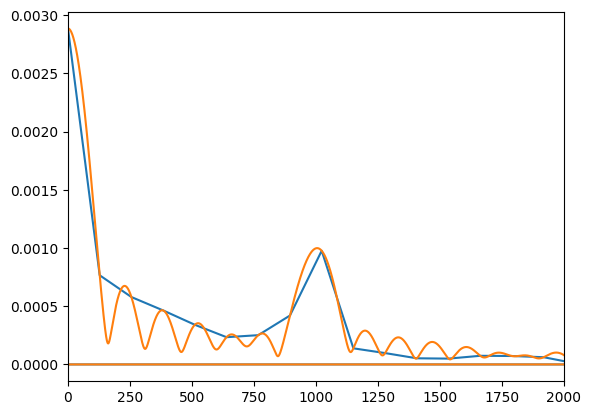

In [181]:
a = np.pad(z_interp, len(z_interp)*2)
a = np.pad(z_interp, 2**20-1)


ft = np.fft.fft(z_interp)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

ft = np.fft.fft(a)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

plt.xlim(0, 2000)

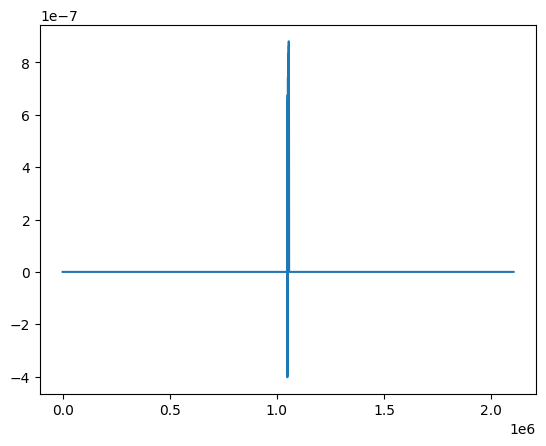

In [182]:
#a = np.pad(z_interp, len(z_interp)*2)

plt.plot(a)